Projeto da disciplina Aprendizado Supervisionado

Aluna: Rosana Xavier Granato


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




In [2]:
import sys

!{sys.executable} -m pip install -U ydata-profiling[notebook]

!jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=dd1ada093f210cab69c98d334b04cefe668e3cd1b79a2b87a6b21e66e58a50ea
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall

In [3]:
url = ('/content/winequalityN (1).csv')

In [4]:
principal_df = pd.read_csv(url)

In [5]:
principal_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
principal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
principal_df['type'].unique()

array(['white', 'red'], dtype=object)

In [8]:
#só manter os vinhos brancos na base conforme enunciado da questão (SEM O COPY ELE CRIA UMA VISUALIZAÇÃO DO FILTRO)

vinho_branco_df = principal_df[principal_df['type'] == 'white'].copy()

In [9]:
vinho_branco_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
vinho_branco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


In [11]:
vinho_branco_df['type'].unique()

array(['white'], dtype=object)

In [12]:
def Opiniao (quality):
    if quality <= 5 :
        return 0
    else:
        return 1


In [13]:
vinho_branco_df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [14]:
vinho_branco_df.loc[:, 'opinion'] = vinho_branco_df['quality'].apply(lambda x: Opiniao(x)).astype(int)

In [15]:
vinho_branco_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,white,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [16]:
vinho_branco_df.drop(columns= 'quality' , inplace= True)

In [17]:
vinho_branco_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [18]:
vinho_branco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  opinion               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


In [19]:
#questão 3
#variáveis contínuas: volatile acidity, citric acid, chlorides, sulphates, alcohol, ph, density
#váriáveis categóricas: type, opinion
#variáveis discretas: fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, opinion
#médias e desvios

vinho_branco_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,0.665169
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [20]:
import sys

!{sys.executable} -m pip install -U ydata-profiling[notebook]

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [21]:
#vinho_branco_df = ProfileReport(vinho_branco_df)

In [22]:
#verificar os valores Nulos

Lin_null = vinho_branco_df[vinho_branco_df.isna().any(axis=1)]
Lin_null.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
17,white,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,1
33,white,6.2,0.12,0.34,NaN,0.045,43.0,117.0,0.9939,3.42,0.51,9.0,1
54,white,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.9930,NaN,0.38,9.1,1
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.9974,3.09,0.44,8.7,1
98,white,9.8,0.36,0.46,10.5,NaN,4.0,83.0,0.9956,2.89,0.30,10.1,0


In [23]:
len(Lin_null)

28

In [24]:
len(vinho_branco_df)

4898

In [25]:
#as linhas nulas com os dados em branco representam menos que 0.5% do dataframe, para aplicar machine learning, vou remover essas
#linhas

In [26]:
vinho_branco_df = vinho_branco_df.dropna(axis=0)

In [27]:
#remover as linhas duplicadas também

vinho_branco_df = vinho_branco_df.drop_duplicates()



In [28]:
#questão 4
#a)Descrição das etapas para criação de modelo de classificação eficiente
#importar as bibliotecas
#Separar dados de entrada e saída
#Separar os dados em treino e teste
#normalizar os conjuntos para estandarizar escala
#criar função pra média e desvio padrão



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importando bibliotecas para calcular as métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score

In [30]:
#Separar dados de entrada e saída
X = vinho_branco_df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide']]
y = vinho_branco_df['opinion']

In [31]:
#Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.30, random_state= 42, stratify= y)

In [32]:
#normalizar os conjuntos para estandarizar escala
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
#criar função pra média e desvio padrão
def avg_kfold_cv(model, X_train, y_train):

    scores_acc = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(accuracy_score))

    print("\nCross Validation Scores - Accuracy: ", scores_acc)
    print("Média CV Score - Accuracy: ", scores_acc.mean())

    scores_pre = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(precision_score))

    print("\nCross Validation Scores - Precision: ", scores_pre)
    print("Média CV Score - Precision: ", scores_pre.mean())

    scores_rec = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(recall_score))

    print("\nCross Validation Scores - Recall: ", scores_rec)
    print("Média CV Score - Recall: ", scores_rec.mean())

    scores_f1 = cross_val_score(model, X_train, y_train, cv = 10, scoring= make_scorer(f1_score))

    print("\nCross Validation Scores - f1 Score: ", scores_f1)
    print("Média CV Score - f1 Score: ", scores_f1.mean())

In [34]:
#questão 4
#b)Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar
#a classificação. Calcule para a base de teste:
#i. a média e desvio da acurácia dos modelos obtidos;

#ii. a média e desvio da precisão dos modelos obtidos;

#iii. a média e desvio da recall dos modelos obtidos;

#iv. a média e desvio do f1-score dos modelos obtidos.

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [37]:
y_hat = LR.predict(X_test)

In [41]:
# Realizando a validação cruzada
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, X_train, y_train, cv=10)
scores

array([0.6884058 , 0.66666667, 0.70289855, 0.67391304, 0.68478261,
       0.71014493, 0.69565217, 0.70289855, 0.67391304, 0.70909091])

In [43]:
print("Accuracy Test:",metrics.accuracy_score(y_test, y_hat))
print("Precision Test:",metrics.precision_score(y_test,y_hat))
print("Recall Test:",metrics.recall_score(y_test,y_hat))
print("f1-score Test:",metrics.f1_score(y_test,y_hat, average='weighted'))

Accuracy Test: 0.6897717666948436
Precision Test: 0.7021484375
Recall Test: 0.9206145966709347
f1-score Test: 0.6434656981378631


In [44]:
result_lr = avg_kfold_cv(LR, X_train, y_train)


Cross Validation Scores - Accuracy:  [0.6884058  0.66666667 0.70289855 0.67391304 0.68478261 0.71014493
 0.69565217 0.70289855 0.67391304 0.70909091]
Média CV Score - Accuracy:  0.6908366271409749

Cross Validation Scores - Precision:  [0.70512821 0.69736842 0.71186441 0.69166667 0.69874477 0.71982759
 0.70762712 0.71551724 0.7        0.71610169]
Média CV Score - Precision:  0.7063846110647171

Cross Validation Scores - Recall:  [0.90659341 0.87362637 0.92307692 0.91208791 0.91758242 0.91758242
 0.91758242 0.91208791 0.88461538 0.92857143]
Média CV Score - Recall:  0.9093406593406593

Cross Validation Scores - f1 Score:  [0.79326923 0.77560976 0.80382775 0.78672986 0.79334917 0.80676329
 0.79904306 0.80193237 0.7815534  0.80861244]
Média CV Score - f1 Score:  0.7950690317153459


In [ ]:
#c) Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
#i. a média e desvio da acurácia dos modelos obtidos;

#ii. a média e desvio da precisão dos modelos obtidos;

#iii. a média e desvio da recall dos modelos obtidos;

#iv. a média e desvio do f1-score dos modelos obtidos.

In [45]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
dTree.fit(X_train, y_train, )

DecisionTreeClassifier(criterion='entropy')

In [46]:
y_hat = dTree.predict(X_test)
y_hat

array([0, 0, 1, ..., 1, 1, 1])

In [47]:
scores = cross_val_score(dTree, X_train, y_train, cv=10)
scores

array([0.66666667, 0.66666667, 0.67391304, 0.65942029, 0.63405797,
       0.6557971 , 0.67753623, 0.67391304, 0.61956522, 0.71636364])

In [48]:
print("Accuracy Test:",metrics.accuracy_score(y_test, y_hat))
print("Precision Test:",metrics.precision_score(y_test,y_hat))
print("Recall Test:",metrics.recall_score(y_test,y_hat))
print("f1-score Test:",metrics.f1_score(y_test,y_hat, average='weighted'))

Accuracy Test: 0.6568047337278107
Precision Test: 0.7376425855513308
Recall Test: 0.7451984635083226
f1-score Test: 0.6559545172438153


In [49]:
result_dTree = avg_kfold_cv(dTree, X_train, y_train)


Cross Validation Scores - Accuracy:  [0.64855072 0.66666667 0.67753623 0.67028986 0.62681159 0.67391304
 0.66666667 0.68478261 0.60507246 0.71272727]
Média CV Score - Accuracy:  0.6633017127799736

Cross Validation Scores - Precision:  [0.73033708 0.75       0.73796791 0.72727273 0.73595506 0.75
 0.76404494 0.75294118 0.71505376 0.7826087 ]
Média CV Score - Precision:  0.7446181355926538

Cross Validation Scores - Recall:  [0.72527473 0.77472527 0.75274725 0.79120879 0.73076923 0.74175824
 0.76923077 0.71978022 0.72527473 0.78021978]
Média CV Score - Recall:  0.7510989010989011

Cross Validation Scores - f1 Score:  [0.76373626 0.74238227 0.75274725 0.74393531 0.72727273 0.77777778
 0.7534626  0.7204611  0.71625344 0.78356164]
Média CV Score - f1 Score:  0.748159038931598


In [ ]:
#d) Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
#i. a média e desvio da acurácia dos modelos obtidos;

#ii. a média e desvio da precisão dos modelos obtidos;

#iii. a média e desvio da recall dos modelos obtidos;

#iv. a média e desvio do f1-score dos modelos obtidos.

In [52]:
from sklearn import svm
clfy = svm.SVC(kernel='rbf', probability=True)
clfy.fit(X_train, y_train)

SVC(probability=True)

In [57]:
y_hat = clfy.predict(X_test)
y_hat

array([1, 0, 1, ..., 1, 1, 1])

In [53]:
scores = cross_val_score(clfy, X_train, y_train, cv=10)
scores

array([0.76086957, 0.76811594, 0.7826087 , 0.74275362, 0.72101449,
       0.74637681, 0.75724638, 0.74637681, 0.72826087, 0.76      ])

In [58]:
print("Accuracy Test:",metrics.accuracy_score(y_test, y_hat))
print("Precision Test:",metrics.precision_score(y_test,y_hat))
print("Recall Test:",metrics.recall_score(y_test,y_hat))
print("f1-score Test:",metrics.f1_score(y_test,y_hat, average='weighted'))

Accuracy Test: 0.7269653423499577
Precision Test: 0.75
Recall Test: 0.8796414852752881
f1-score Test: 0.7102772495894665


In [59]:
result_SVM = avg_kfold_cv(clfy, X_train, y_train)


Cross Validation Scores - Accuracy:  [0.76086957 0.76811594 0.7826087  0.74275362 0.72101449 0.74637681
 0.75724638 0.74637681 0.72826087 0.76      ]
Média CV Score - Accuracy:  0.7513623188405798

Cross Validation Scores - Precision:  [0.76851852 0.78365385 0.79326923 0.76303318 0.75362319 0.76666667
 0.76995305 0.7745098  0.75598086 0.78431373]
Média CV Score - Precision:  0.7713522068168486

Cross Validation Scores - Recall:  [0.91208791 0.8956044  0.90659341 0.88461538 0.85714286 0.88461538
 0.9010989  0.86813187 0.86813187 0.87912088]
Média CV Score - Recall:  0.8857142857142858

Cross Validation Scores - f1 Score:  [0.83417085 0.83589744 0.84615385 0.81933842 0.80205656 0.82142857
 0.83037975 0.81865285 0.80818414 0.82901554]
Média CV Score - f1 Score:  0.8245277969253323


In [ ]:
#5. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação.
#Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada
#um dos gráficos e justifique.

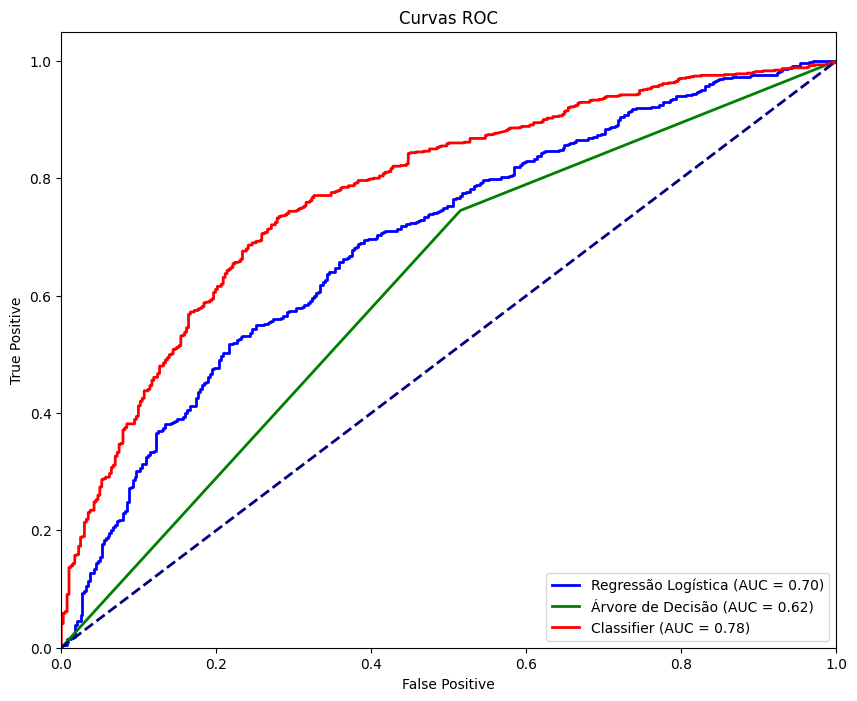

In [61]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Curvas ROC e AUC para cada modelo
modelos = [LR, dTree, clfy]
nomes_modelos = ['Regressão Logística', 'Árvore de Decisão', 'Classifier']
cores = ['blue', 'green', 'red']

plt.figure(figsize=(10, 8))

for modelo, nome, cor in zip(modelos, nomes_modelos, cores):
    # Previsões de probabilidade para a classe positiva
    probas = modelo.predict_proba(X_test)[:, 1]
    # Calcular ROC
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    # Calcular AUC
    roc_auc = auc(fpr, tpr)
    # Plotar a curva ROC
    plt.plot(fpr, tpr, color=cor, lw=2, label=f'{nome} (AUC = {roc_auc:.2f})')

# Adicionando detalhes ao gráfico
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Curvas ROC')
plt.legend(loc="lower right")
plt.show()

O modelo SVM 'Classifier' apresenta a maior AUC (0.78)

Mediante os outros modelos, este modelo teve a melhor classificação entre os 3 estudados dentro dos parâmetros do projeto.

In [ ]:
#6. Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo.
# Ele funciona da mesma forma para essa nova base? Justifique.

In [62]:
Vinho_tinto_df = principal_df[principal_df['type'] == 'red'].copy()

In [63]:
def Opiniao (quality):
    if quality <= 5 :
        return 0
    else:
        return 1

In [64]:
Vinho_tinto_df.loc[:, 'opinion'] = Vinho_tinto_df['quality'].apply(lambda x: Opiniao(x)).astype(int)

In [65]:
Vinho_tinto_df.drop(columns= 'quality' , inplace= True)

In [101]:
#6.1

X = Vinho_tinto_df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide']]
y = Vinho_tinto_df['opinion']

In [100]:
# Padronizando os dados por completos do dataset e atribuindo a uma variavel
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.30, random_state= 42, stratify= y)

In [102]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_hat = clfy.predict(X_test)
y_hat

In [ ]:
print("Accuracy Test:",metrics.accuracy_score(y_tint, y_hat))
print("Precision Test:",metrics.precision_score(y_tint,y_hat))
print("Recall Test:",metrics.recall_score(y_tint,yhat))
print("f1-score Test:",metrics.f1_score(y_tint,yhat, average='weighted'))

In [108]:
RocCurveDisplay.from_estimator(clfy, X, y)
plt.show()

NameError: ignored